# Multiple Linear Regression

Bike Sharing System study

Problem statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:
Model the demand for shared bikes with the available independent variables. The model for management to understand the demand dynamics of a new market. 


# Step 1: Reading and Understanding Data
Let us first import NumPy and Pandas and read the Bike sharing Datasheet


In [577]:
#supress warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [578]:
import numpy as np
import pandas as pd
bikesharing=pd.read_csv(r"C:\Users\sudhe\Downloads\day.csv")
bikesharing.drop('instant', inplace= True ,axis=1)
bikesharing.drop('dteday',inplace=True, axis=1)
bikesharing.drop('casual',inplace=True, axis=1)
bikesharing.drop('registered', inplace=True, axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [579]:
#checking the shape of bike sharing  dataframe
bikesharing.shape

(730, 12)

In [580]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [581]:
#Inspect the various aspect of the housing file
bikesharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: Visualising Data
Understanding the following-
1. If there is some obvious multicollinearity going on, here we would catch iy
2. Here's where you'd also identify if some predictors directly have some strong association with the outcome variable

We'll visualize our data using the matplotlib and seaborn

In [582]:
#Converting integer values to strings

season={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
bikesharing.season[bikesharing.season==1]='Spring'
bikesharing.season[bikesharing.season==2]='Summer'
bikesharing.season[bikesharing.season==3]='Fall'
bikesharing.season[bikesharing.season==4]='Winter'
bikesharing

weathersit={1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikesharing.weathersit[bikesharing.weathersit==1]='Clear'
bikesharing.weathersit[bikesharing.weathersit==2]='Mist'
bikesharing.weathersit[bikesharing.weathersit==3]='Light Snow'
bikesharing.weathersit[bikesharing.weathersit==4]='Heavy Rain'
bikesharing

bikesharing.workingday[bikesharing.workingday==1]='Yes'
bikesharing.workingday[bikesharing.workingday==0]='No'
bikesharing

bikesharing.holiday[bikesharing.holiday==1]='Yes'
bikesharing.holiday[bikesharing.holiday==0]='No'

bikesharing.yr[bikesharing.yr==0]=2018
bikesharing.yr[bikesharing.yr==1]=2019

bikesharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,1,No,1,Yes,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,1,No,2,Yes,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,1,No,3,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,1,No,4,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,1,No,5,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,12,No,5,Yes,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,2019,12,No,6,No,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,2019,12,No,0,No,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,2019,12,No,1,Yes,Clear,10.489153,11.58500,48.3333,23.500518,1796


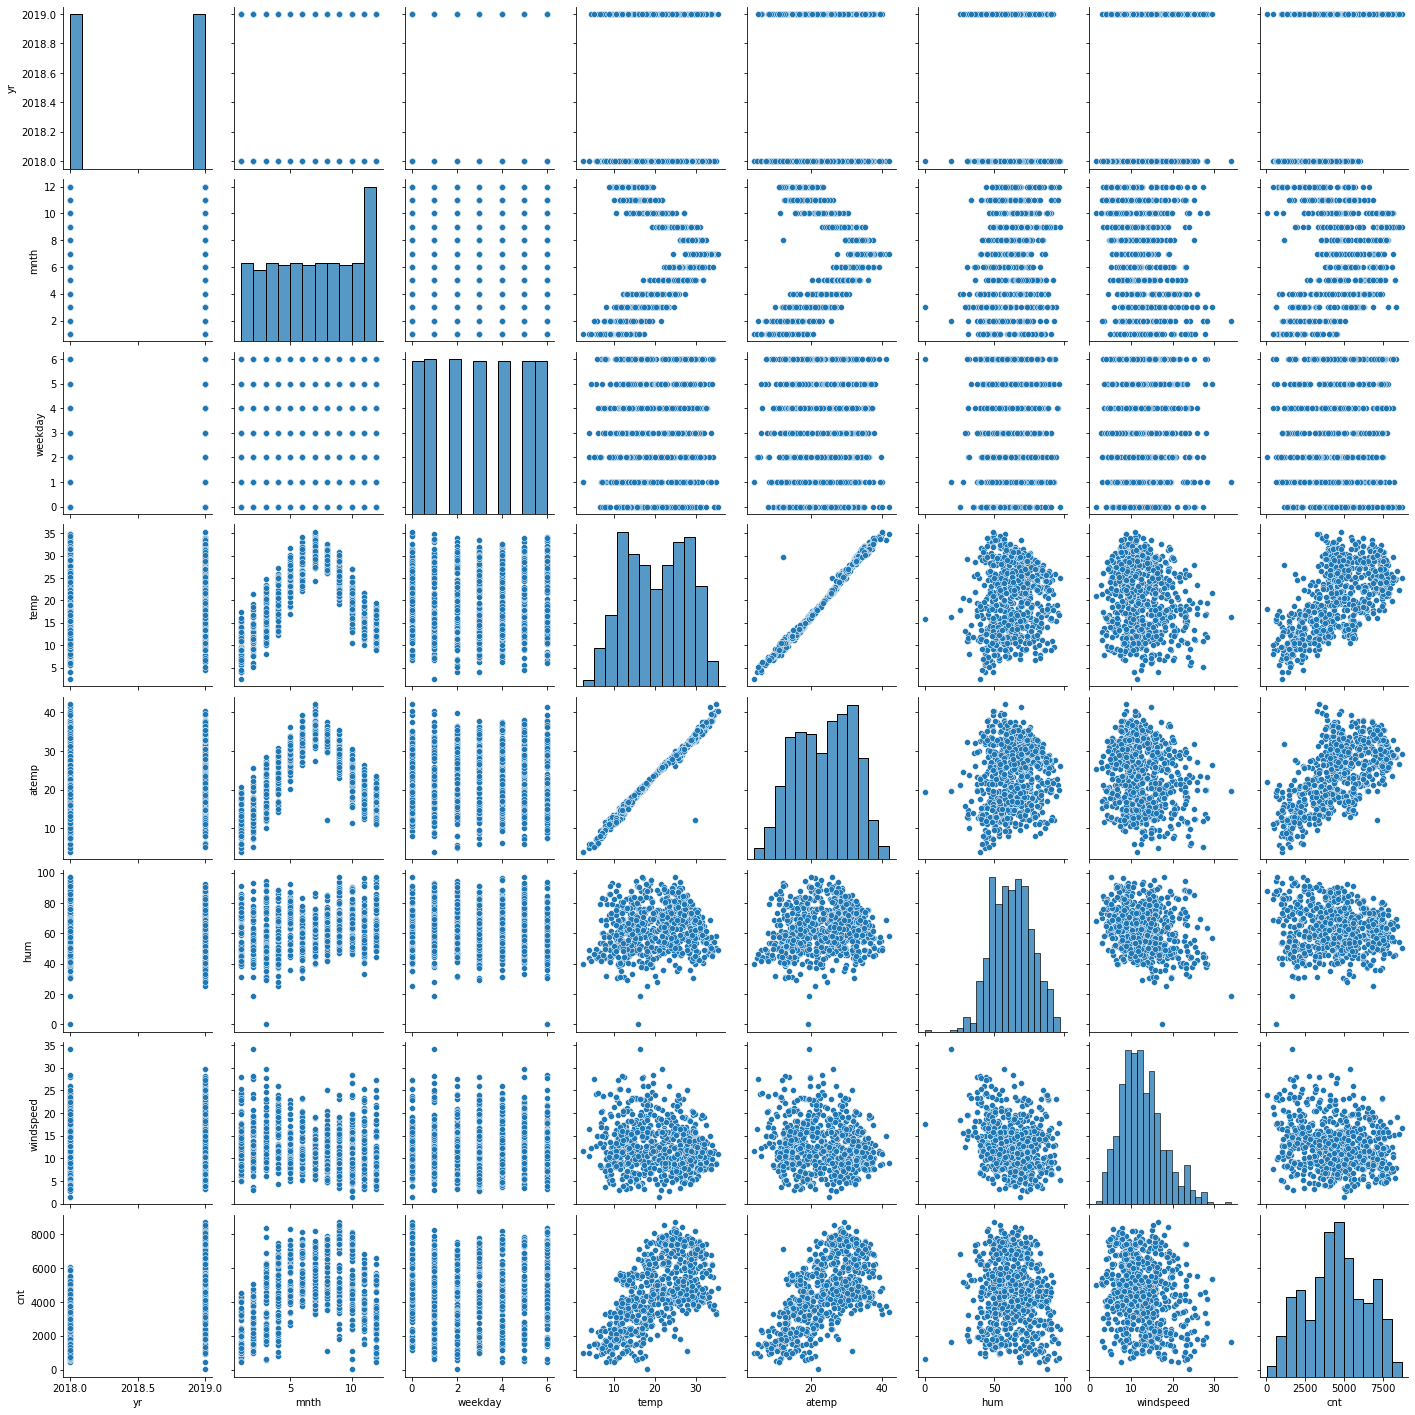

In [583]:
#Visualisng Numeric values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(bikesharing)
plt.show()

#### Visualising Categorical Varibles

There are few categorical variables as wee. Some box plot can give more insight on these variables.


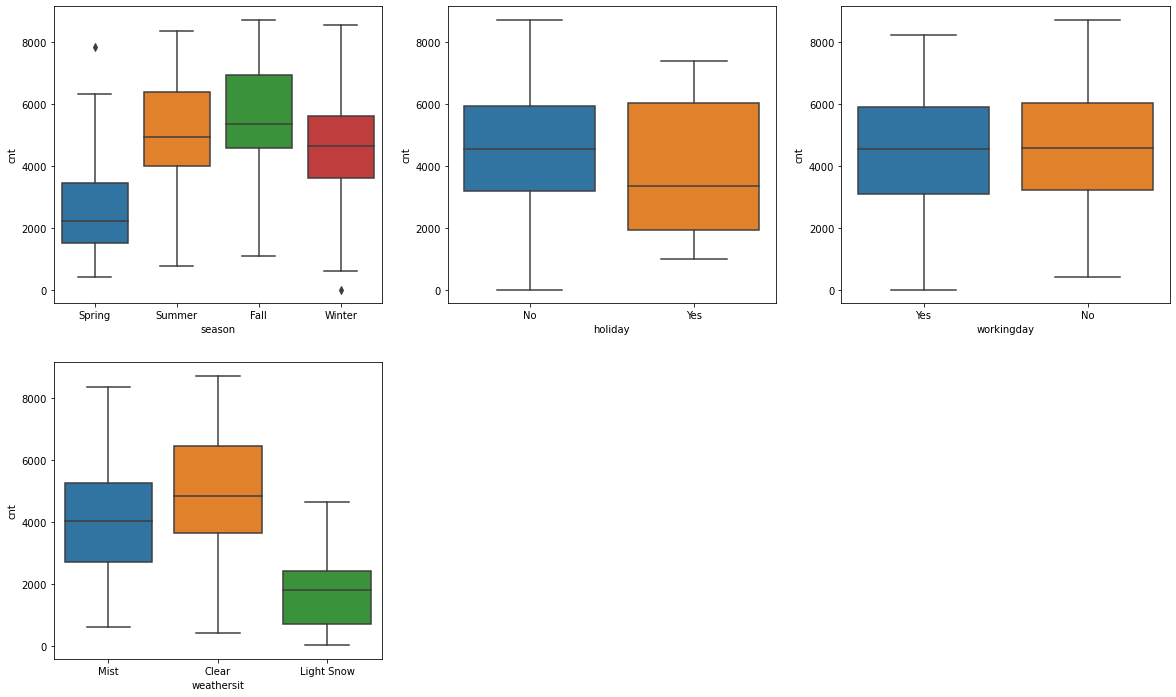

In [584]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

# Step 3: Data Preparation

1. You can see that dataset has many columns with values as 'Yes' or 'No'
2. But in order to fit a regression line, we would need numericals and not string. Hence need to covert them to 1s and 0s, where 1 as 'Yes' and 0 as 'No'

In [585]:
#Yes/No varibles 
bikesharing.holiday.value_counts()
bikesharing.workingday.value_counts()

Yes    504
No     226
Name: workingday, dtype: int64

In [586]:
#Check the bikesharing dataframe now

varlist=['workingday','holiday']
bikesharing[varlist]=bikesharing[varlist].apply(lambda x: x.map({'Yes':1,'No':0}))
bikesharing[varlist].head()

,workingday,holiday
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Dummy Varibles
The variable 'season' and 'weathersit' has four levels.  We need to convert these levels into integers as well.

For this, we will use something called "dummy variables"


In [587]:
#Get the dummy varibles for the feature 'season' and 'weathesit'
season1=pd.get_dummies(bikesharing['season'])

In [588]:
#Check what the dataset 'status' look like
import pandas as pd

season1=pd.get_dummies(bikesharing['season'])
season1=pd.get_dummies(bikesharing['season'],drop_first=True)
season1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [589]:
ws=pd.get_dummies(bikesharing['weathersit'])
ws=pd.get_dummies(bikesharing['weathersit'],drop_first=True)
ws.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [590]:
#Add the results to the original bikesharing dataframe

bikesharing=pd.concat([bikesharing, season1], axis = 1)
bikesharing=pd.concat([bikesharing, ws], axis = 1)
bikesharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
0,Spring,2018,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,Spring,2018,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,Spring,2018,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,Spring,2018,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,Spring,2018,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [591]:
#Drop season and weathersit as we have dummjies
bikesharing.drop(['season'], axis = 1, inplace = True)
bikesharing.drop(['weathersit'], axis = 1, inplace = True)
bikesharing

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
0,2018,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,12,0,5,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,1
726,2019,12,0,6,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,1
727,2019,12,0,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,1
728,2019,12,0,1,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0


# Splitting the Data into Training and Testing Sets

Rescaling has to be done to put all values in  comparable scale. Coeffieicnts of that we get through fitting might have very large or small values
This can be done thropugh-
Min-Max scaling
Standardisation (mean=0, Sigma=1)


In [592]:
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler()
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size=0.7, test_size=0.3, random_state =100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr','mnth','weekday','temp','atemp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [593]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
653,1.0,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1.0,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1.0,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1.0,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1.0,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


In [594]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.491830,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.315338,0.157763,0.329528,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


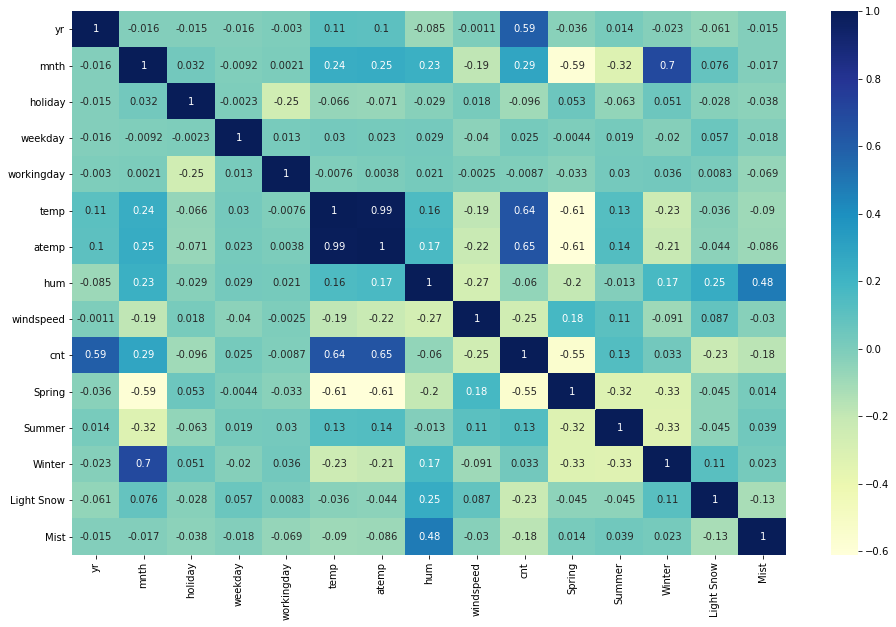

In [595]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

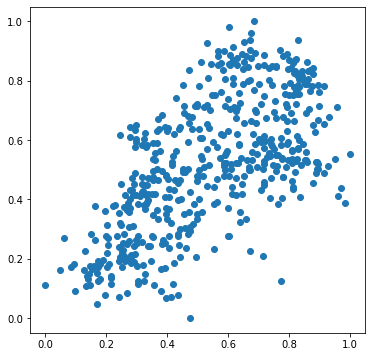

In [596]:
#Just a plot to see relation between cnt and temp
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for model building

In [597]:
df_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'Spring', 'Summer', 'Winter', 'Light Snow',
       'Mist'],
      dtype='object')

In [598]:
import statsmodels.api as sm
y_train=df_train.pop('cnt')
#X_train=df_train
#X_train_lm = sm.add_constant(X_train)
#lr_1=sm.OLS(y_train, X_train_lm).fit()
#lr_1.params
df_train


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Snow,Mist
653,1.0,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0
576,1.0,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1.0,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1.0,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.454545,0,0.333333,1,0.824514,0.762183,0.605840,0.355596,0,1,0,0,1
578,1.0,0.636364,0,0.833333,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0
53,0.0,0.090909,0,0.833333,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,0
350,0.0,1.000000,0,0.166667,1,0.248216,0.223544,0.577930,0.431816,0,0,1,0,1


In [599]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [600]:
#FIRST MODEL

import statsmodels.api as sm
X_train=df_train
X_train_sm=sm.add_constant(X_train)
lr = sm.OLS(y_train , X_train_sm)
#fit the model
lr_model = lr.fit()
#summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          8.32e-180
Time:                        21:56:55   Log-Likelihood:                 489.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     495   BIC:                            -885.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2900      0.039      7.512      0.000       0.214       0.366
yr             0.2312      0.008     27.285      0.000       0.215       0.248
mnth           0.0152      0.026      0.581      0.561      -0.036       0.066
holiday       -0.1018      0.028     -3.695      0.000      -0.156      -0.048
weekday        0.0177      0.013      1.388      0.166      -0.007       0.043
workingday    -0.0201      0.010     -2.091      0.037      -0.039      -0.001
temp           0.4342      0.141      3.081      0.002       0.157       0.711
atemp          0.0603      0.144      0.419      0.676      -0.223       0.343
hum           -0.1362      0.039     -3.457      0.001      -0.214      -0.059
windspeed     -0.1781      0.027     -6.503      0.000      -0.232      -0.124
Spring        -0.0708      0.023     -3.031      0.003      -0.117      -0.025
Summer         0.0451      0.016      2.844      0.005       0.014       0.076
Winter         0.0830      0.019      4.404      0.000       0.046       0.120
Light Snow    -0.2439      0.028     -8.830      0.000      -0.298      -0.190
Mist          -0.0557      0.011     -5.043      0.000      -0.077      -0.034
==============================================================================
Omnibus:                       67.270   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.427
Skew:                          -0.686   Prob(JB):                     3.25e-36
Kurtosis:                       5.410   Cond. No.                         92.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking VIF

Variance Inflation Factor or VIF, gives idea about multicollinearity

In [601]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [602]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,379.46
6,atemp,368.00
7,hum,31.14
1,mnth,12.34
8,windspeed,5.04
11,Winter,4.68
9,Spring,4.39
4,workingday,3.69
3,weekday,3.21
10,Summer,2.71


In [603]:
# Dropping 'atemp' variable and updating the model

X=X_train.drop('atemp',1,)

In [604]:
#SECOND MODEL
X_train_sm=sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_sm).fit()

In [605]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          6.53e-181
Time:                        21:56:55   Log-Likelihood:                 489.49
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     496   BIC:                            -891.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2896      0.039      7.511      0.000       0.214       0.365
yr             0.2311      0.008     27.305      0.000       0.215       0.248
mnth           0.0152      0.026      0.583      0.560      -0.036       0.066
holiday       -0.1021      0.028     -3.708      0.000      -0.156      -0.048
weekday        0.0174      0.013      1.368      0.172      -0.008       0.042
workingday    -0.0199      0.010     -2.071      0.039      -0.039      -0.001
temp           0.4914      0.035     14.213      0.000       0.424       0.559
hum           -0.1354      0.039     -3.445      0.001      -0.213      -0.058
windspeed     -0.1804      0.027     -6.721      0.000      -0.233      -0.128
Spring        -0.0698      0.023     -3.006      0.003      -0.115      -0.024
Summer         0.0463      0.016      2.963      0.003       0.016       0.077
Winter         0.0844      0.019      4.544      0.000       0.048       0.121
Light Snow    -0.2447      0.028     -8.881      0.000      -0.299      -0.191
Mist          -0.0558      0.011     -5.058      0.000      -0.078      -0.034
==============================================================================
Omnibus:                       66.058   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.770
Skew:                          -0.673   Prob(JB):                     1.23e-35
Kurtosis:                       5.398   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [606]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,31.10
5,temp,16.56
1,mnth,12.34
7,windspeed,4.80
10,Winter,4.55
8,Spring,4.32
4,workingday,3.68
3,weekday,3.19
9,Summer,2.62
12,Mist,2.36


In [607]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)
# Build a third fitted model
X_train_sm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_sm).fit()

In [608]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.2
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          5.33e-182
Time:                        21:56:55   Log-Likelihood:                 489.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     497   BIC:                            -897.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2971      0.036      8.179      0.000       0.226       0.369
yr             0.2309      0.008     27.324      0.000       0.214       0.248
holiday       -0.1016      0.028     -3.696      0.000      -0.156      -0.048
weekday        0.0174      0.013      1.371      0.171      -0.008       0.042
workingday    -0.0201      0.010     -2.095      0.037      -0.039      -0.001
temp           0.4923      0.035     14.258      0.000       0.424       0.560
hum           -0.1333      0.039     -3.408      0.001      -0.210      -0.056
windspeed     -0.1800      0.027     -6.713      0.000      -0.233      -0.127
Spring        -0.0759      0.021     -3.671      0.000      -0.117      -0.035
Summer         0.0421      0.014      3.033      0.003       0.015       0.069
Winter         0.0888      0.017      5.242      0.000       0.056       0.122
Light Snow    -0.2456      0.027     -8.934      0.000      -0.300      -0.192
Mist          -0.0562      0.011     -5.102      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       66.149   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.651
Skew:                          -0.673   Prob(JB):                     7.91e-36
Kurtosis:                       5.407   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [609]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,28.35
4,temp,15.26
6,windspeed,4.68
7,Spring,3.85
3,workingday,3.68
2,weekday,3.18
9,Winter,3.12
11,Mist,2.33
8,Summer,2.28
0,yr,2.08


In [610]:
X = X.drop('weekday', 1)

In [611]:
# Build a fourth fitted model
X_train_sm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_sm).fit()

In [612]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          8.96e-183
Time:                        21:56:55   Log-Likelihood:                 488.35
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     498   BIC:                            -901.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3047      0.036      8.481      0.000       0.234       0.375
yr             0.2307      0.008     27.281      0.000       0.214       0.247
holiday       -0.1014      0.028     -3.685      0.000      -0.155      -0.047
workingday    -0.0199      0.010     -2.075      0.038      -0.039      -0.001
temp           0.4938      0.035     14.300      0.000       0.426       0.562
hum           -0.1331      0.039     -3.399      0.001      -0.210      -0.056
windspeed     -0.1816      0.027     -6.775      0.000      -0.234      -0.129
Spring        -0.0750      0.021     -3.626      0.000      -0.116      -0.034
Summer         0.0428      0.014      3.077      0.002       0.015       0.070
Winter         0.0890      0.017      5.252      0.000       0.056       0.122
Light Snow    -0.2434      0.027     -8.862      0.000      -0.297      -0.189
Mist          -0.0563      0.011     -5.109      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       69.612   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.361
Skew:                          -0.712   Prob(JB):                     4.55e-37
Kurtosis:                       5.418   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [613]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.06
3,temp,14.90
5,windspeed,4.68
6,Spring,3.76
2,workingday,3.67
8,Winter,3.09
10,Mist,2.33
7,Summer,2.26
0,yr,2.08
9,Light Snow,1.24


In [614]:
X = X.drop('hum', 1)

In [615]:
# Build a FINAL fitted model
X_train_sm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_sm).fit()

In [616]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.7
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          1.69e-181
Time:                        21:56:55   Log-Likelihood:                 482.50
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.031      7.803      0.000       0.179       0.300
yr             0.2339      0.008     27.534      0.000       0.217       0.251
holiday       -0.1044      0.028     -3.754      0.000      -0.159      -0.050
workingday    -0.0223      0.010     -2.305      0.022      -0.041      -0.003
temp           0.4655      0.034     13.745      0.000       0.399       0.532
windspeed     -0.1548      0.026     -5.979      0.000      -0.206      -0.104
Spring        -0.0824      0.021     -3.965      0.000      -0.123      -0.042
Summer         0.0381      0.014      2.724      0.007       0.011       0.065
Winter         0.0773      0.017      4.611      0.000       0.044       0.110
Light Snow    -0.2804      0.025    -11.002      0.000      -0.330      -0.230
Mist          -0.0782      0.009     -8.644      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       68.140   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.132
Skew:                          -0.707   Prob(JB):                     2.79e-35
Kurtosis:                       5.342   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.61
3,temp,4.50
2,workingday,3.53
5,Spring,2.19
0,yr,2.07
6,Summer,1.86
7,Winter,1.81
9,Mist,1.53
1,holiday,1.10
8,Light Snow,1.08


In [618]:
#lr_5 is the best model with all VIF less than 5 and good 'p' values. 

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like


In [619]:
y_train_cnt=lr_5.predict(X_train_sm)

Text(0.5, 0, 'Errors')

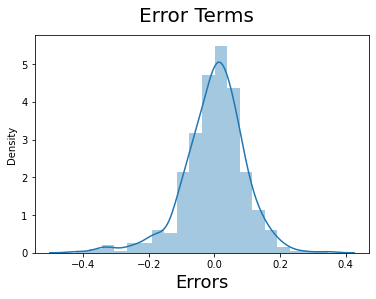

In [620]:
# Plot the histogram of the error terms
y_train_cnt=lr_5.predict(X_train_sm)
fig = plt.figure()
sns.distplot((y_train - 
              y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth(lr_5) model.

In [622]:
num_vars = ['yr','mnth','weekday','temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [623]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.516743,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.311080,0.188034,0.343089,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [624]:
y_test=df_test.pop('cnt')
df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Snow,Mist
184,0.0,0.545455,1,0.500000,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,0.454545,0,0.666667,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,0.0,0.818182,0,1.000000,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,0.0,0.636364,0,0.833333,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,0.0,0.454545,0,1.000000,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.090909,0,0.333333,1,0.257562,0.243430,0.708888,0.287411,1,0,0,0,1
702,1.0,1.000000,0,0.500000,1,0.519232,0.511907,0.756118,0.283397,0,0,1,0,0
127,0.0,0.363636,0,0.333333,1,0.584649,0.577380,0.650923,0.069510,0,1,0,0,0
640,1.0,0.818182,0,0.666667,1,0.745598,0.682653,0.817947,0.052115,0,0,1,0,1


In [625]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [626]:
#Adding  constant variable to test dataframe
X_test_sm=sm.add_constant(X_test)
X_test_sm=X_test_sm.drop(["atemp","hum","mnth","weekday"], axis = 1)

In [627]:
y_pred_m5 = lr_5.predict(X_test_sm)

# Model Evaluation
Let's now plot the graph for actual versus predicted values


Text(0, 0.5, 'y_pred')

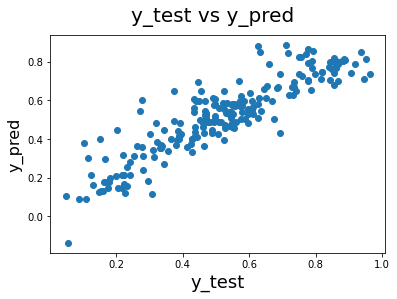

In [628]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [629]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.8045012773764902

We can see that the equation of our best fitted line is:


# Count of total rental bikes= 0.2339xyr-0.1044xholiday- 0.0223xworkingday+0.4655xtemp-0.1548xwindspeed-0.0824xSpring+0.0381xSummer+0.0773xWinter-0.2804xLigntSnow-0.0782xMist+0.2394
